In [1]:
using Pkg; Pkg.activate(".")
using Plots

  Activating environment at `~/Documents/Papers/inverse/Project.toml`


In [2]:
function l(x::Float64, a::Float64, b::Float64)
    if -a*x - b > 0
        return sqrt(-a*x - b)
    else
        return 0
    end
end

function r(x::Float64, c::Float64, d::Float64)
    if c*x - d > 0
        return sqrt(c*x - d)
    else
        return 0
    end
end

function gaussian(x::Float64, β::Float64)
    sqrt(β/π)*exp(-β*(x - μ)^2)
end

gaussian (generic function with 1 method)

In [3]:
bmin = 0.01
db = 0.01
bmax = 5.0
beta = collect(bmin:db:bmax)

500-element Vector{Float64}:
 0.01
 0.02
 0.03
 0.04
 0.05
 0.06
 0.07
 0.08
 0.09
 0.1
 0.11
 0.12
 0.13
 ⋮
 4.89
 4.9
 4.91
 4.92
 4.93
 4.94
 4.95
 4.96
 4.97
 4.98
 4.99
 5.0

a = 0.4361534650905736
b = 0.3516984055174457
c = 0.957118839868176
d = -0.31966989328174056


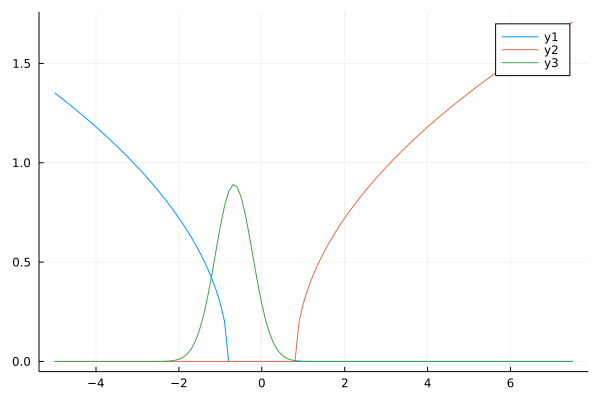

In [4]:
a,c = rand(Float64, 2)
b,d = rand(Float64, 2) .* sign.(randn(Float64, 2))
if abs(a) < abs(b)
    bs = sign(b)
    temp = a
    a = abs(b)
    b = bs*temp
end
if abs(c) < abs(d)
    cs = sign(b)
    temp = c
    c = abs(d)
    d = cs*temp
end
μ_t = rand(Float64)
μ = (1-μ_t)*(-b/a) + μ_t*(d/c)
xs = collect(-5.0:0.1:7.5)
println("a = ",a)
println("b = ",b)
println("c = ",c)
println("d = ",d)
Plots.plot(xs, map(x -> l(x, a, b), xs))
Plots.plot!(xs, map(x -> r(x, a, b), xs))
#Plots.plot!(xs, map(x -> gaussian(x,bmin), xs))
Plots.plot!(xs, map(x -> gaussian(x,(bmax-bmin)/2), xs))
#Plots.plot!(xs, map(x -> gaussian(x,bmax), xs))

In [5]:
function swap(a,b)
    tmp = a
    a = sign(b)*abs(b)
    b = sign(tmp)*abs(tmp)
    return a,b
end

swap (generic function with 1 method)

In [6]:
d = 1
c = 2
b = 2
a = -3
println(-b/a, " ", d/c)

0.6666666666666666 0.5


In [7]:
if (d/c) < (-b/a)
    b, d = d, b
    a, c = c, a
end
println(a, b, c, d)
println(-b/a, " ", d/c)

21-32
-0.5 -0.6666666666666666


In [19]:
if (d/c) < (-b/a)
    tmp, d = d, -b
    b = -tmp
    a, c = c, a
end
println(a, b, c, d)
println(-b/a, " ", d/c)

2-1-3-2
0.5 0.6666666666666666


In [ ]:
using JLD2: @load
train_file = "data/train_data.out"
test_file = "data/test_data.out"
@load train_file traindata
@load test_file testdata
println(size(traindata))
println(typeof(traindata))

In [12]:
num_rows = Int64(round(length(traindata)))
num_column = length(traindata[1][1])
num_params = length(traindata[1][2])+1

x_train = Array{Float64,2}(undef, num_rows*num_column, num_params)
y_train = Array{Float64,1}(undef, num_rows*num_column)

LoadError: OutOfMemoryError()

In [11]:
xmin = 0.05
dx = 0.01
xmax = 5.0
beta = collect(xmin:dx:xmax)

496-element Vector{Float64}:
 0.05
 0.06
 0.07
 0.08
 0.09
 0.1
 0.11
 0.12
 0.13
 0.14
 0.15
 0.16
 0.17
 ⋮
 4.89
 4.9
 4.91
 4.92
 4.93
 4.94
 4.95
 4.96
 4.97
 4.98
 4.99
 5.0

In [10]:
push!(traindata[1][2], beta[2])

5-element Vector{Float64}:
  0.8966256574673253
  0.4107459916051559
  0.8933331189402165
  0.04995796871762037
 -0.43318686083600866

In [ ]:
for i in 1:length(num_rows)
    for j un 1:length(num_column)
        x_train[i*num_column+j,:] = push!(copy(traindata[i][2], beta[j])
        y_train[i*num_column+j]= traindata[i][1][j]